In [1]:
from db_manager import DatabaseManager


In [2]:
db_manager = DatabaseManager()

In [11]:
db_manager.create_database('university')

(True, "Database 'university' created successfully")

In [12]:
db_manager.list_databases()

['mydb2', 'university']

In [13]:
student_schema = {
    "student_id": int,
    "name": str,
    "Phone": str,
    "age": float,
    "Branch": str
}

In [14]:
prof = {
    "prof_id": int,
    "name": str,
    "Phone": str,
    "age": float,
    "salary": int,
    "department": str
}

In [15]:
db_manager.create_table('university', 'professor', prof, order=6, search_key= "prof_id")

(True, "Table 'professor' created successfully in database 'university'")

In [16]:
db_manager.create_table('university', 'student', student_schema, order=6, search_key= "student_id")

(True, "Table 'student' created successfully in database 'university'")

In [17]:
tables_name, _ = db_manager.list_tables('university')
tables_name

['professor', 'student']

In [18]:
table_stu, _ = db_manager.get_table('university', 'student')
table_stu.get_all()

[]

In [35]:
rec = {
    "student_id": 9,
    "name": "xyzf",
    "Phone": "846699",
    "age": 26.0,
    "Branch": "pech Eng1"
}

### INsertion

In [36]:
table_stu.insert(rec)

(True, 9)

### Search

In [21]:
table_stu.get(6)


{'student_id': 6,
 'name': 'xyzf',
 'Phone': '846699',
 'age': 26.0,
 'Branch': 'pech Eng1'}

### Update

In [41]:
new_rec = {'student_id': 25,
 'name': 'xyzf',
 'Phone': '846',
 'age': 26.0,
 'Branch': 'pech Eng1'}

In [42]:
table_stu.update('xyzf', new_rec)

(True, 'Record updated')

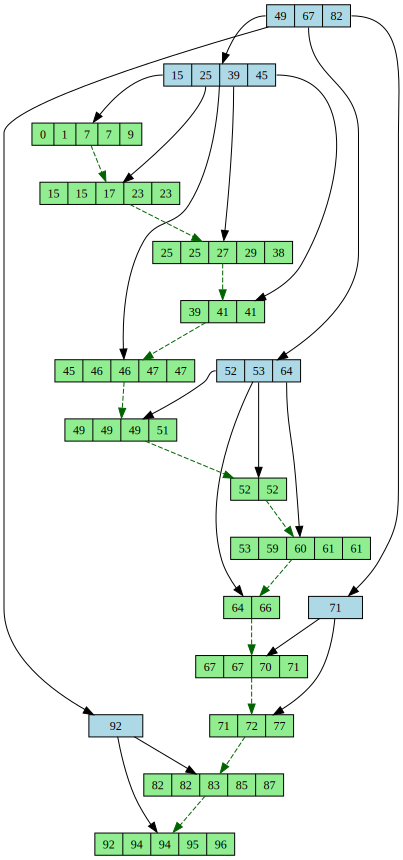

In [47]:
from IPython.display import SVG, display

dot = table_stu.data.visualize_tree()
svg_data = dot.pipe(format='svg').decode('utf-8')
display(SVG(svg_data))

### Deletion

In [42]:
table_stu.delete(6)

(True, 'Record deleted')

### Range Query

In [45]:
import random
import string

def random_record_generator(schema, n):
    def random_value(data_type):
        if data_type == int:
            return random.randint(1, 100)
        elif data_type == float:
            return round(random.uniform(18.0, 60.0), 2)
        elif data_type == str:
            return ''.join(random.choices(string.ascii_letters, k=6))
        else:
            return None  # Unknown type

    records = []
    for _ in range(n):
        record = {}
        for field, field_type in schema.items():
            record[field] = random_value(field_type)
        records.append(record)
    return records

In [46]:
import pandas as pd
records = random_record_generator(student_schema, 50)

for rec in records:
    table_stu.insert(rec)
 

In [48]:
table_stu.range_query(63, 70)

[(64,
  {'student_id': 64,
   'name': 'PRpIqg',
   'Phone': 'kHSDRP',
   'age': 26.7,
   'Branch': 'STXUyO'}),
 (66,
  {'student_id': 66,
   'name': 'TLKxuT',
   'Phone': 'nCHjRx',
   'age': 34.59,
   'Branch': 'TzVIbd'}),
 (67,
  {'student_id': 67,
   'name': 'aRzfuh',
   'Phone': 'HFCVxY',
   'age': 46.32,
   'Branch': 'yoZNom'}),
 (67,
  {'student_id': 67,
   'name': 'YDrHyk',
   'Phone': 'ZrqWQI',
   'age': 22.05,
   'Branch': 'wAZXxy'}),
 (70,
  {'student_id': 70,
   'name': 'ZavVCx',
   'Phone': 'ZDgLsO',
   'age': 44.03,
   'Branch': 'zCWZsu'})]

## Performance testing